In [1]:
%matplotlib inline
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
def bgr_to_rgb(img):
    b,g,r = cv2.split(img)
    return cv2.merge([r,g,b])

In [3]:
def get_label(file: str, labels: dict):
    match = re.search('[a-z]+', file).group(0)
    return labels[match]

In [4]:
def load_all_imgs(path, dict_label, img_size, mode):
    imgs = []
    labels = []
    files = os.listdir(path)
    files.sort()
    print(f'\n{path} found {len(files)} img to load')
    for index, file in enumerate(files):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, mode)
        
        if mode == 0:
            img = np.expand_dims(img, 2)
            
        img = bgr_to_rgb(img)
        img = cv2.resize(img, img_size)
        img = img / 255.
        imgs.append(img)
        labels.append(get_label(file, dict_label))
        if index % 100 == 0:
            print(f'\n[{index}]:', end='')
        else:
            print("|", end='')
    return np.array(imgs), np.array(labels)

In [5]:
labels = {'healthy': 0, 'mild': 1, 'moderate': 2, 'severe': 3}

imgs, labels = load_all_imgs('../dataset/dataset_64x64', labels, (64,64), mode=1)


../dataset/dataset_64x64 found 6194 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[200]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[300]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[400]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[500]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[600]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[700]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[800]:||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [6]:
imgs.shape

(6194, 64, 64, 3)

In [7]:
labels.shape

(6194,)

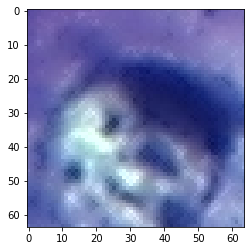

In [8]:
plt.imshow(imgs[1])

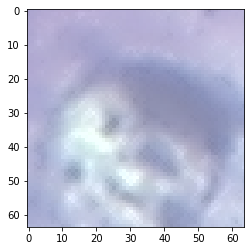

In [9]:
plt.imshow((imgs[1] + 1) / 2.)

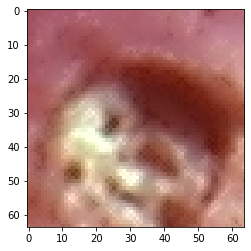

In [10]:
img = cv2.imread('../dataset/dataset_64x64/healthy-image003-2-roi1-0-1.tif', 1)
plt.imshow(img)

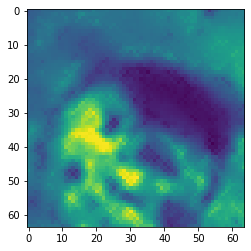

In [11]:
img = cv2.imread('../dataset/dataset_64x64/healthy-image003-2-roi1-0-1.tif', 0)
plt.imshow(img)

In [12]:
img_mode_1 = cv2.imread('../dataset/dataset_64x64/healthy-image003-2-roi1-0-1.tif', 1)

In [13]:
img_mode_1.shape

(64, 64, 3)

In [14]:
pos_img_1 = img_mode_1 / float(255)

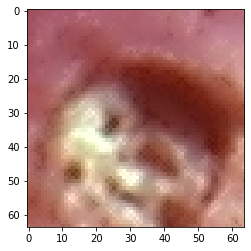

In [15]:
plt.imshow(pos_img_1)

In [16]:
img_mode_1.max()

255

In [17]:
pos_img_1.max()

1.0

In [18]:
pos_img_1.min()

0.03529411764705882

In [19]:
img_mode_0 = cv2.imread('../dataset/dataset_64x64/healthy-image003-2-roi1-0-1.tif', 0)

In [20]:
pos_img_0 = img_mode_0 / float(255)

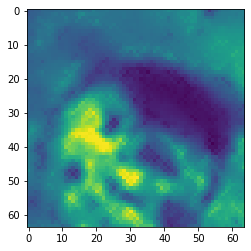

In [21]:
plt.imshow(pos_img_0)

In [22]:
pos_img_0.max()

0.984313725490196

In [23]:
pos_img_0.min()

0.09019607843137255

In [24]:
img_mode_0.max()

251

In [25]:
img_mode_0.shape

(64, 64)

In [26]:
imgs[0].shape

(64, 64, 3)

In [27]:
imgs[0].max()

0.7725490196078432

In [28]:
imgs[0].min()

0.07450980392156863